<a href="https://colab.research.google.com/github/arnavjune2/DL-notes/blob/main/demo_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/iNeuron DL')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/iNeuron DL'

In [ ]:
!ls

test.h5


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#gives details of the graphic card
!nvidia-smi

Wed Feb  2 16:44:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.keras.__version__

'2.7.0'

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) =  mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape #60,000 data points of 28*28 size images

(60000, 28, 28)

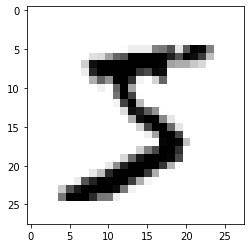

In [ ]:
img = X_train_full[0]
plt.imshow(img,  cmap="binary")

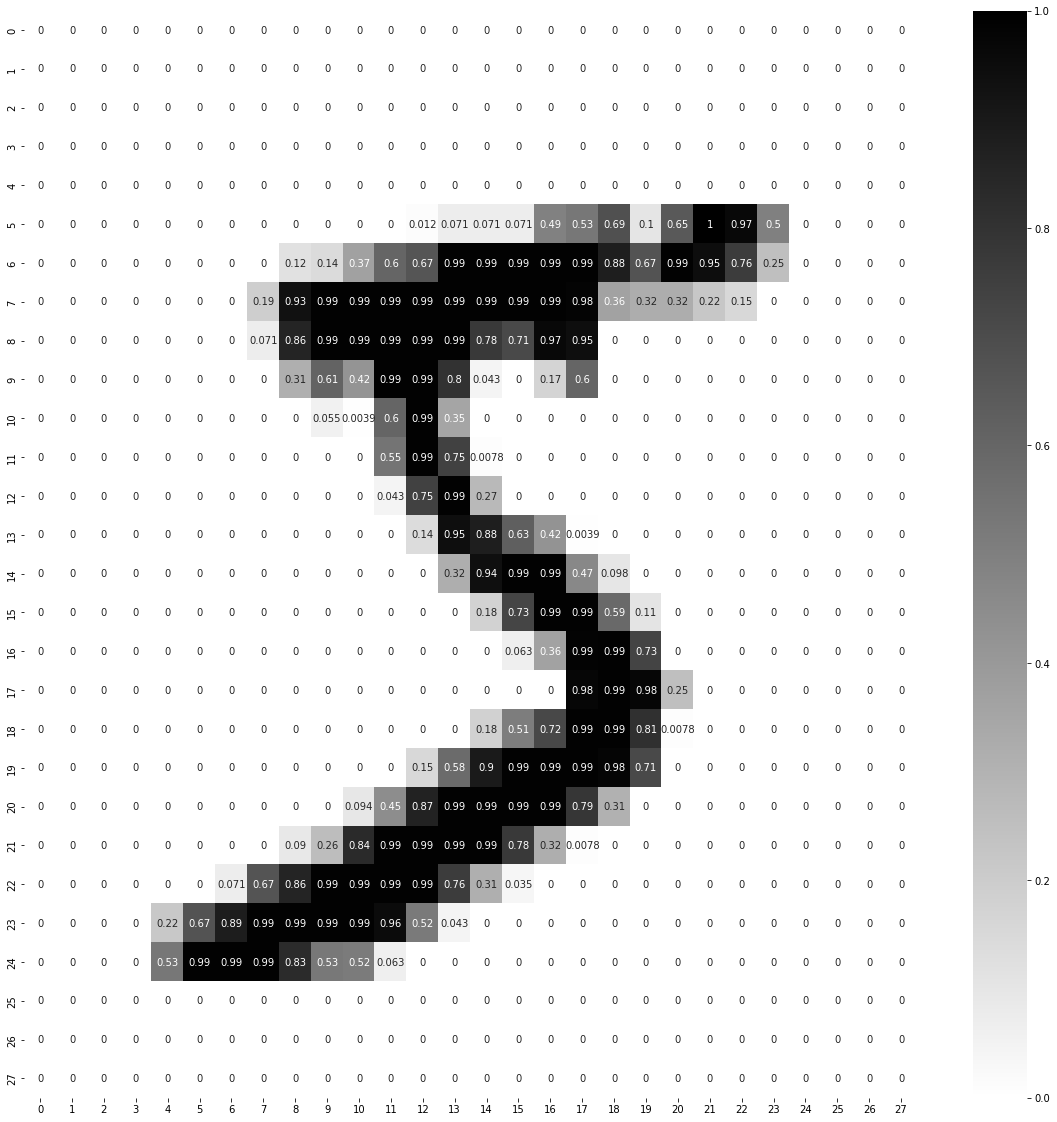

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap='binary')

# TensorBoard
### write images into the TensorBoards for visulaisation

In [ ]:
###Create a log dir for tensorboard logs
import time
def get_log_path(base_Log_dir="logs/fit"):
  uniqueName = time.asctime().replace(" ", "_").replace(":", "")
  log_path = os.path.join(base_Log_dir, uniqueName)
  print(f"saving logs at: {log_path}")
  return log_path

saving logs at: logs/fit/Wed_Feb__2_172533_2022


In [ ]:
X_valid, X_train = X_train_full[:5000] /255 , X_train_full[5000:] /255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_test = X_test/255

In [ ]:
CLASSES= 10
#first we will perform flattening operation
LAYERS=[
        tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
        tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer")
]

In [ ]:
model_clf= tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss= LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics= METRICS)

In [ ]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6015 - accuracy: 0.8468 - val_loss: 0.3096 - val_accuracy: 0.9174
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2911 - accuracy: 0.9171 - val_loss: 0.2413 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2382 - accuracy: 0.9327 - val_loss: 0.2044 - val_accuracy: 0.9452
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2032 - accuracy: 0.9418 - val_loss: 0.1787 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1774 - accuracy: 0.9495 - val_loss: 0.1625 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1575 - accuracy: 0.9552 - val_loss: 0.1455 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1411 - accuracy: 0.9595 - val_loss: 0.1351 - val_accuracy:

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9774


[0.07052379846572876, 0.977400004863739]

In [ ]:
model_clf.save("test.h5")

In [ ]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.001,
        0.   ]], dtype=float32)

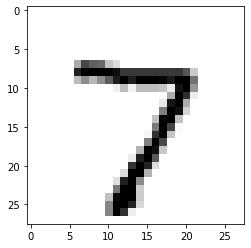

In [ ]:
plt.imshow(X_new[0], cmap="binary")

In [ ]:
Y_pred= np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

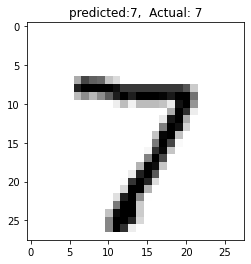

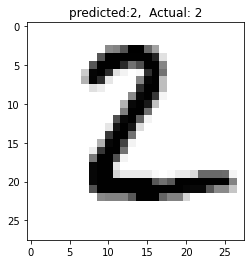

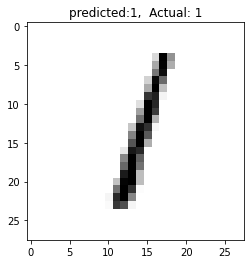

In [ ]:
for img_Array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_Array, cmap="binary")
  plt.title(f"predicted:{pred},  Actual: {actual}")
  plt.show()

In [ ]:
dt = {4:56,8:90}


In [ ]:
t1= [7,1,5,3,6,4]

In [ ]:
def maxProfit(prices):
        
    
    current = 0
    profit = []
    while(current<len(prices)):

      mini = 0
      for i in range(len(prices[:current+1])):
        if prices[i]< prices[mini]:
            mini = i
      arr = prices[mini:current+1]
      current += 1
      profit.append(max(arr)-prices[mini])
    return max(profit)

In [ ]:
maxProfit(t1)

[7]  0
[1]  1
[1, 5]  1
[1, 5, 3]  1
[1, 5, 3, 6]  1
[1, 5, 3, 6, 4]  1
[0, 0, 4, 4, 5, 5]


5

In [ ]:
#we can use TensorBoard to visualise
#write images into the TensorBoard for visualisation
